
# **Analysis of Data Science and STEM Salaries in python**

**Importing the Essential Libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
import math
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns


**Loading data**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Levels_Fyi_Salary_Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [5]:
print(f"""
> Summary
{'-' * 40}
> The Dataset has {df.shape[0]} entries and {df.shape[1]} features.
> There's a total of {df.isna().sum().sum()} missing entries/observations.
    - Gender, Other Details, Race, and Education compromise the majority of the missing values.
> The start date is {df.timestamp.min()} and ends on {df.timestamp.max()}.
> The dataset is compromise of dtypes: float64(6), int64(12), object(10)
    - 10 of which are binary features specifiying feature Race and Education.
""")


> Summary
----------------------------------------
> The Dataset has 62642 entries and 29 features.
> There's a total of 115512 missing entries/observations.
    - Gender, Other Details, Race, and Education compromise the majority of the missing values.
> The start date is 1/1/2019 11:38:29 and ends on 9/9/2020 9:57:39.
> The dataset is compromise of dtypes: float64(6), int64(12), object(10)
    - 10 of which are binary features specifiying feature Race and Education.



In [6]:
pd.isnull(df).sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

# **Data Cleaning** 

In [7]:
# dimension reduction (dropping of insignificant columns)
df.drop('level', axis = 1, inplace = True);
df.drop('tag', axis = 1, inplace = True);
df.drop('otherdetails', axis = 1, inplace = True);
df.drop('dmaid', axis = 1, inplace = True)

In [8]:
#delete rows with base salary is zero
df = df.loc[df["basesalary"] != 0]

In [9]:
# replacing blank values in Race, education, gender with N/A
df["Race"].fillna("N/A", inplace = True);
df["Education"].fillna("N/A", inplace = True);
df["gender"].fillna("N/A", inplace = True)

In [10]:
df.head()

,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,107000.0,20000.0,10000.0,...,0,0,0,0,0,0,0,0,N/A,N/A
2,6/11/2017 14:53:57,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,155000.0,0.0,0.0,...,0,0,0,0,0,0,0,0,N/A,N/A
3,6/17/2017 0:23:14,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,157000.0,180000.0,35000.0,...,0,0,0,0,0,0,0,0,N/A,N/A
6,6/22/2017 12:37:51,Microsoft,Software Engineering Manager,300000,"Redmond, WA",15.0,11.0,180000.0,65000.0,55000.0,...,0,0,0,0,0,0,0,0,N/A,N/A
7,6/22/2017 13:55:26,Microsoft,Software Engineer,156000,"Seattle, WA",4.0,4.0,135000.0,8000.0,13000.0,...,0,0,0,0,0,0,0,0,N/A,N/A


Rounding off years of experience to closest natural number

In [11]:
df['yearsofexperience'].round(decimals = 0)
df['yearsofexperience'] = df['yearsofexperience'].replace(0.0, 1.0)
df['yearsofexperience']

0         1.5
2         8.0
3         7.0
6        15.0
7         4.0
         ... 
62637    10.0
62638     2.0
62639    14.0
62640     8.0
62641     1.0
Name: yearsofexperience, Length: 60338, dtype: float64

In [12]:
df['yearsatcompany'].round(decimals = 0)
df['yearsatcompany'] = df['yearsatcompany'].replace(0.0, 1.0)
df['yearsatcompany']

0         1.5
2         1.0
3         5.0
6        11.0
7         4.0
         ... 
62637     1.0
62638     2.0
62639    12.0
62640     4.0
62641     1.0
Name: yearsatcompany, Length: 60338, dtype: float64

In [13]:
df['city'] = df.location.apply(lambda x: x.split(',')[0])
df['state'] = df.location.apply(lambda x: x.split(',')[1])
df['country'] = df.location.apply(lambda x: x.split(',')[-1])

In [14]:
df['city'] = df['city'].apply(lambda x: x.strip())
df['state'] =  df['state'].apply(lambda x: x.strip())
df['country'] = df['country'].apply(lambda x: x.strip())

In [15]:
df.loc[ df.country.str.len() == 2,'country'] = 'US'
df.country.value_counts().head(6)

US                50778
India              2781
Canada             1743
United Kingdom     1165
Germany             566
Singapore           371
Name: country, dtype: int64

In [16]:
df.loc[df["gender"] == "Title: Senior Software Engineer", "gender"] = 'N/A'

In [17]:
ls

drive/  sample_data/


In [18]:
cd /content/drive/MyDrive/OPIM 5512 Python Group 6/Initial Dataset

[Errno 2] No such file or directory: '/content/drive/MyDrive/OPIM 5512 Python Group 6/Initial Dataset'
/content


In [19]:
df.to_csv('final_dataset_v1.csv', index = False)

In [20]:
ls

drive/  final_dataset_v1.csv  sample_data/


# **Exploratory Data Analysis**

In [21]:
#Top 10 Jobs profiles and their count

job_title = df["title"].value_counts()[0:10].reset_index()
job_title.columns = ["Job", "Count"]
job_title

,Job,Count
0,Software Engineer,39695
1,Product Manager,4405
2,Software Engineering Manager,3339
3,Data Scientist,2480
4,Hardware Engineer,2154
5,Product Designer,1462
6,Technical Program Manager,1379
7,Solution Architect,1101
8,Management Consultant,976
9,Business Analyst,882


**The most common title is Software Engineer**

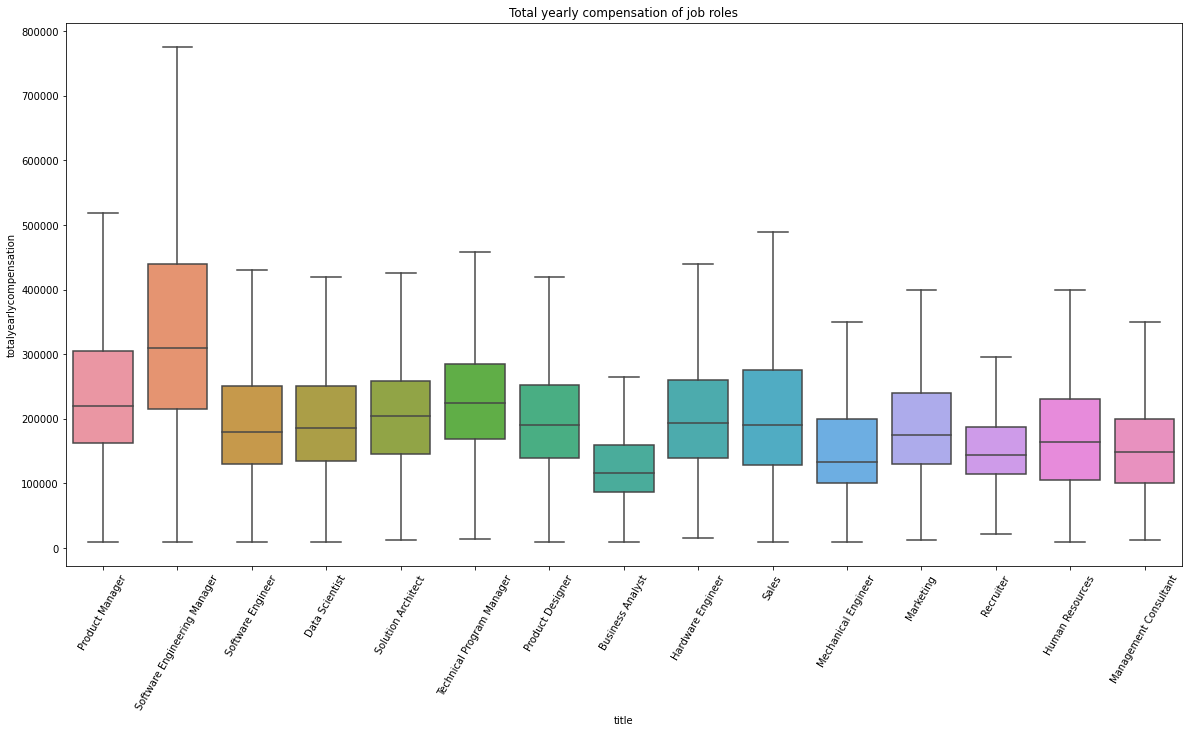

In [22]:
# box plot of total_yearly_compensation of each job profile
f, ax = plt.subplots(figsize=(20, 10))
plt.xticks(rotation=60)
var = 'title'
fig = sns.boxplot(x=var, y="totalyearlycompensation", data=df, showfliers = False).set(title="Total yearly compensation of job roles")

**Total yearly compensation is highest for Software Engineering manager**

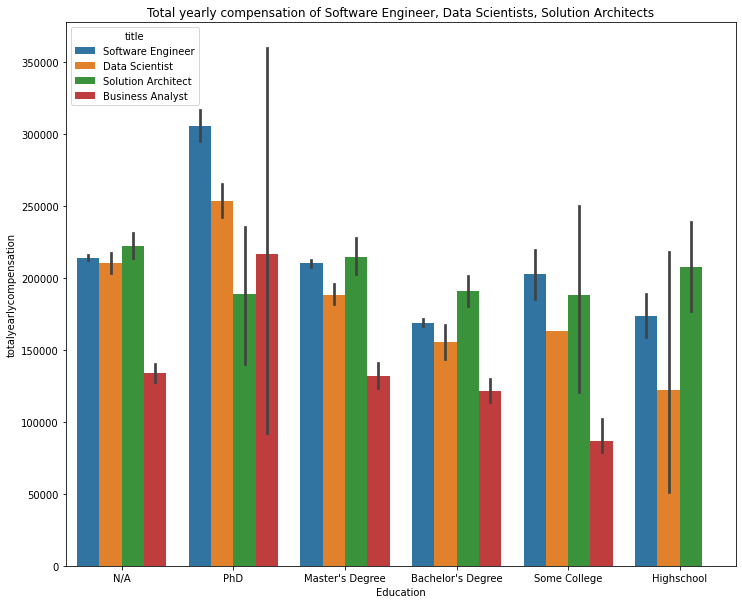

In [23]:
my_job = ["Data Scientist","Solution Architect", "Software Engineer", "Business Analyst"]
data_t = df[df["title"].isin(my_job)]
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.barplot(y="totalyearlycompensation", x="Education", data=data_t, hue = "title", orient = "v")
ax.set_title("Total yearly compensation of Software Engineer, Data Scientists, Solution Architects")
plt.show()

**Data Scientists with a PhD have avaerage income larger than Data Scientists with only a Master's Degree, whereas the opposite holds for Solution Architects in Master's and Bachelors's.**

**The biggest amount of STEM jobs are in Amazon**

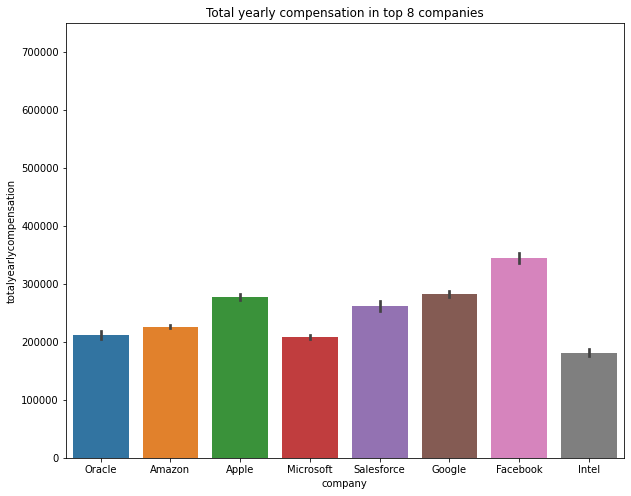

In [24]:
df_company = df[(df['company'] == 'Amazon') | (df['company'] == 'Microsoft') | (df['company'] == 'Google')
       | (df['company'] == 'Facebook') | (df['company'] == 'Apple') | (df['company'] == 'Oracle') | (df['company'] == 'Salesforce') | (df['company'] == 'Intel')]

var = 'company'
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.barplot(x=var, y="totalyearlycompensation", data=df_company)
fig.set_title("Total yearly compensation in top 8 companies")
fig.axis(ymin=0, ymax=750000);

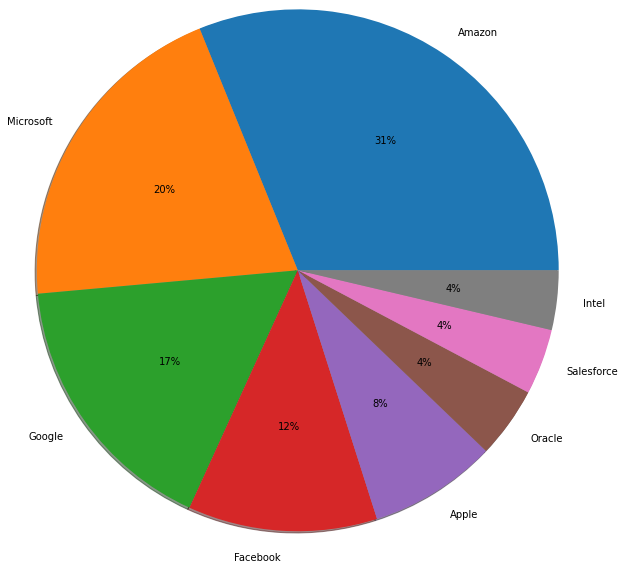

In [25]:
# Distribution of Top 8 companies

company_title = df["company"].value_counts()[0:8].reset_index()
company_title.columns = ["company", "Count"]
plt.pie(company_title['Count'],labels=company_title['company'], autopct='%.0f%%',radius=3,shadow=True)
plt.show()

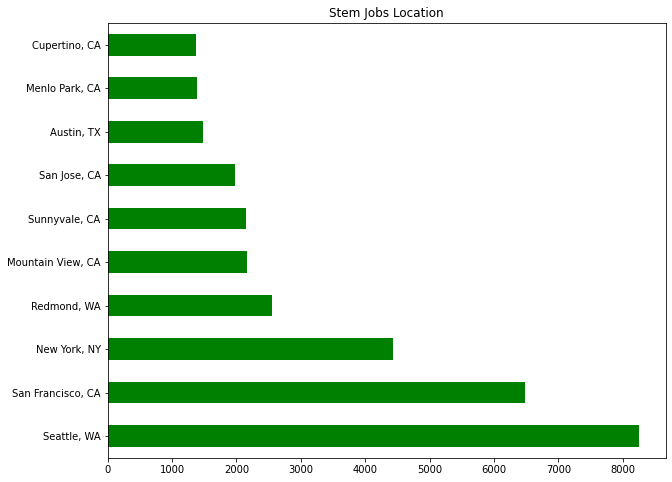

In [26]:
plt.figure(figsize=(10,8))
df["location"].value_counts()[:10].plot.barh(title='Stem Jobs Location', color='green');

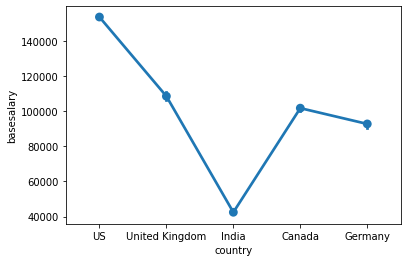

In [27]:
df = df.join(pd.get_dummies(df.country)[['US', 'India', 'Canada', 'United Kingdom', 'Germany']])
sns.pointplot( data = df[df.country.isin(['US', 'India', 'Canada', 'United Kingdom', 'Germany'])],y = 'basesalary', x = 'country')

**The most common location is Seattle, Washington**

**USA seems to be the best location for this kind of jobs.**

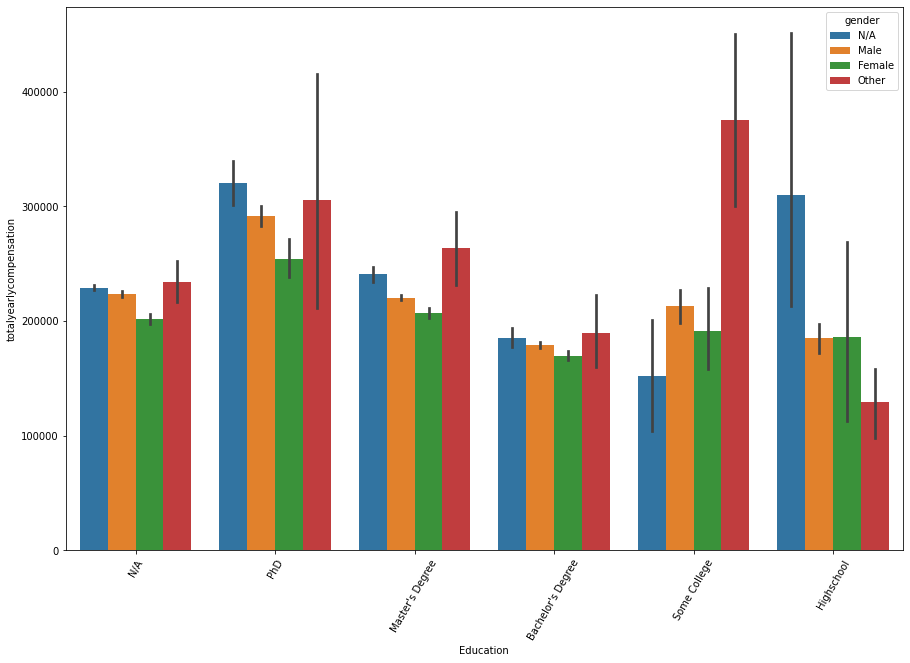

In [28]:
f, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation=60)
sns.barplot(x = 'Education', hue =  'gender', y = 'totalyearlycompensation', data = df)

**we can find that the total_yearly_compensation for PhD are the highest in all metrics**

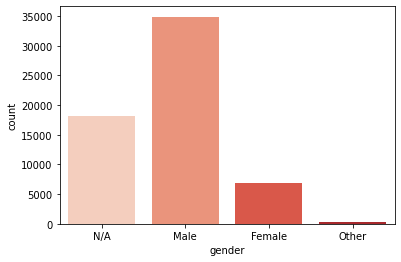

In [29]:
sns.countplot(data = df, x = 'gender', palette="Reds")

**From the data above, gender don't have impact on average salary in STEM. But from the other side - there's more men than women working in this sector.**

**Correlation with Total Yearly Compensation**

In [30]:
# Sorting of variables into numerical and categorical variables

data = df.copy()
categorical = []
numerical = []

for column in data.columns:
    if data[column].dtype == 'object':
        categorical.append(column)
    else:
        numerical.append(column)

In [31]:
correlation = pd.DataFrame(data[numerical].corrwith(data['totalyearlycompensation']), columns = ['values'])
correlation

,values
totalyearlycompensation,1.000000
yearsofexperience,0.421577
yearsatcompany,0.166169
basesalary,0.772879
stockgrantvalue,0.794929
bonus,0.507434
cityid,-0.110924
rowNumber,-0.091403
Masters_Degree,0.021252
Bachelors_Degree,-0.141220


# **Regression**

In [32]:
# checking corelations
corelation_table = df.corr(method ='pearson')

In [33]:
ls

drive/  final_dataset_v1.csv  sample_data/


In [34]:
corelation_table.to_csv("corelation_table", index = False)

In [35]:
X = df[['yearsatcompany', 'yearsofexperience', 'Masters_Degree']]
y = df['totalyearlycompensation']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)


[-3014.73950888 10928.50131128 -1404.47121925]


In [36]:
from sklearn.linear_model import LinearRegression
# Fit a linear regression model to the data
model = LinearRegression()
model.fit(df[['yearsatcompany', 'yearsofexperience', 'Masters_Degree']], df[['totalyearlycompensation']])
print(model)

# Make predictions
expected = df[['totalyearlycompensation']]
predicted = model.predict(df[['yearsatcompany', 'yearsofexperience', 'Masters_Degree']])

# Summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print( mse)
#print(model.score(df[['yearsatcompany', 'yearsofexperience', 'Masters_Degree']], df[['totalyearlycompensation']]))

LinearRegression()
totalyearlycompensation    1.556786e+10
dtype: float64


In [37]:
X = df[['yearsatcompany', 'yearsofexperience']]
y = df['totalyearlycompensation']

regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)
from sklearn.linear_model import LinearRegression
# Fit a linear regression model to the data
model = LinearRegression()
model.fit(df[['yearsatcompany', 'yearsofexperience']], df[['totalyearlycompensation']])
print(model)

# Make predictions
expected = df[['totalyearlycompensation']]
predicted = model.predict(df[['yearsatcompany', 'yearsofexperience']])

# Summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print( mse)
print(regr.coef_)
#print(model.score(df[['yearsatcompany', 'yearsofexperience', 'Masters_Degree']], df[['totalyearlycompensation']]))

[-3015.01600409 10922.08085848]
LinearRegression()
totalyearlycompensation    1.556824e+10
dtype: float64
[-3015.01600409 10922.08085848]


# **Modeling**

In [38]:
training_data = df.sample(frac=0.6, random_state=25)
testing_data = df.drop(training_data.index)

In [39]:
training_data.shape

(36203, 33)

In [40]:
testing_data.shape

(24135, 33)

In [41]:
X_train = training_data[['basesalary', 'yearsatcompany']]
y_train = training_data[['totalyearlycompensation']]
y_test = testing_data[['totalyearlycompensation']]
X_test = testing_data[['basesalary', 'yearsatcompany']]

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)
mse = np.mean((y_test_pred-y_test)**2)
print("The R-square score of linear model on test set is {0: .4f}.".format(r2_score(y_test, y_test_pred)))
print(lr.coef_)


The R-square score of linear model on test set is  0.6063.
[[  1.85080146 973.12116361]]


In [43]:
 #Decision_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error
Classifier = DecisionTreeClassifier(criterion='entropy', random_state=1)
Classifier.fit(X_train, y_train)
y_pred = Classifier.predict(X_test)
accuracy_Tree = accuracy_score(y_test, y_pred)
print('Accuracy-DecisionTree: %.4f' % accuracy_Tree)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

Accuracy-DecisionTree: 0.0738
0.4632096673409858
10424740733.338968


In [44]:
# Perceptron 
from sklearn.linear_model import Perceptron 
from sklearn.metrics import r2_score, mean_squared_error
ppn = Perceptron(max_iter=40 , eta0=0.01, random_state=2)
ppn.fit(X_train , y_train)
y_pred = ppn.predict(X_test)

accuracy_Percep = accuracy_score(y_test,y_pred)

from sklearn.metrics import accuracy_score
# print ('Missclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_Percep)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.0005
-1.4392946346822395
47372339983.88796


In [45]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
KNN_grid = GridSearchCV(estimator= KNeighborsClassifier(), param_grid={'n_neighbors': np.arange(1,20)}, cv=5)
X_knn = pd.concat([X_train, X_test])
y_knn = pd.concat([y_train, y_test])
KNN_grid.fit(X_knn, y_knn)
y_pred = KNN_grid.predict(X_test)
n = KNN_grid.best_params_['n_neighbors']
print('The optimal number of neighbors: ', n)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist

The optimal number of neighbors:  18
0.48059337861565443
10087140236.467205
